In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from fbprophet import Prophet


In [2]:
#  IMporting sklearn libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from time import time
from scipy.stats import randint as sp_randint
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

## MODEL SELECTION & TUNING FOR LUPIN LTD.

#  DATA INGESTION

In [3]:
lupin_df=pd.read_csv("LUPIN.NS.csv")

In [4]:
lupin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1233 entries, 0 to 1232
Data columns (total 55 columns):
date                   1233 non-null object
open                   1233 non-null float64
high                   1233 non-null float64
low                    1233 non-null float64
close                  1233 non-null float64
adj close              1233 non-null float64
volume                 1233 non-null int64
vwap                   1233 non-null float64
nse                    1233 non-null float64
spy                    1233 non-null float64
dj                     1233 non-null float64
nasdaq                 1233 non-null float64
pcod                   1232 non-null float64
hld                    1233 non-null float64
rsi                    1214 non-null float64
bbul                   1214 non-null float64
bbll                   1214 non-null float64
stma                   1214 non-null float64
ltma                   1114 non-null float64
ema                    1215 non-null floa

In [4]:
lupin_df.describe

<bound method NDFrame.describe of             date        open        high         low       close   adj close  \
0     2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
1     2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2     2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
3     2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
4     2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   
5     2013-01-08  595.099976  605.000000  595.099976  597.950012  582.759094   
6     2013-01-09  598.750000  602.000000  590.250000  592.299988  577.252563   
7     2013-01-10  597.900024  597.900024  581.200012  585.049988  570.186768   
8     2013-01-11  589.349976  591.250000  584.500000  587.700012  572.769470   
9     2013-01-14  588.000000  589.700012  576.000000  579.099976  564.387939   
10    2013-01-15  577.500000  587.099976  570.799988  583.150024  568.335083   
11    

In [6]:
lupin_df.head(10)

,date,open,high,low,close,adj close,volume,vwap,nse,spy,...,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,close_12_ema,close_26_ema,macd,macds,macdh
0,2013-01-01,682.099976,685.099976,679.650024,684.500000,654.123230,1007303,682.68,5993.250000,1462.420044,...,62.997056,54.332352,54.332352,80.326465,80.326465,684.500000,684.500000,0.000000,0.000000,0.000000
1,2013-01-02,689.900024,690.000000,683.049988,687.349976,656.846680,2427399,686.96,5993.250000,1462.420044,...,66.796652,58.487119,58.487119,83.415719,83.415719,686.043737,685.979795,0.063942,0.035523,0.056837
2,2013-01-03,690.000000,690.000000,680.400024,683.349976,653.024231,2285683,684.70,5993.250000,1462.420044,...,56.447239,57.807159,57.807159,53.727398,53.727398,684.992361,685.034927,-0.042565,0.003520,-0.092170
3,2013-01-04,685.000000,685.000000,672.799988,679.349976,649.201782,2721127,676.86,6009.500000,1459.369995,...,50.325259,55.313192,55.313192,40.349392,40.349392,683.211281,683.445663,-0.234382,-0.077070,-0.314623
4,2013-01-07,683.700012,683.700012,666.000000,668.200012,638.546509,2751142,671.03,6016.149902,1466.469971,...,36.605745,49.077376,49.077376,11.662482,11.662482,679.132773,679.910134,-0.777361,-0.285391,-0.983940
5,2013-01-08,668.000000,673.400024,665.700012,670.250000,640.505676,2471299,669.34,5988.399902,1461.890015,...,30.645243,42.933332,42.933332,6.069065,6.069065,676.973792,677.975286,-1.001494,-0.479495,-1.043999
6,2013-01-09,672.000000,672.549988,666.049988,667.500000,637.877625,3217991,669.96,6001.700195,1457.150024,...,22.899283,36.255315,36.255315,-3.812783,-3.812783,674.859748,676.112311,-1.252562,-0.675138,-1.154850
7,2013-01-10,669.500000,678.000000,666.500000,675.799988,645.809326,2282592,673.90,5971.500000,1461.020020,...,29.120758,33.877130,33.877130,19.608014,19.608014,675.055962,676.061988,-1.006026,-0.754656,-0.502739
8,2013-01-11,676.900024,676.900024,666.700012,669.299988,639.597717,2570857,670.13,5968.649902,1472.119995,...,24.352080,30.702113,30.702113,11.652013,11.652013,673.917225,675.059711,-1.142486,-0.844247,-0.596478
9,2013-01-14,668.150024,670.500000,667.099976,669.299988,639.597717,2847437,669.13,5951.299805,1472.050049,...,21.172961,27.525729,27.525729,8.467425,8.467425,673.042261,674.264925,-1.222665,-0.929034,-0.587261


In [5]:
lupin_df.tail()

,date,open,high,low,close,adj close,volume,vwap,nse,spy,...,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,close_12_ema,close_26_ema,macd,macds,macdh
1228,2017-12-26,872.000000,876.400024,864.349976,872.200012,872.200012,1383753,871.07,10493.000000,2683.340088,...,73.356006,77.288337,77.288337,65.491344,65.491344,860.183637,860.806346,-0.622708,-9.811370,18.377323
1229,2017-12-27,872.950012,885.200012,870.000000,875.099976,875.099976,3710542,877.81,10531.500000,2680.500000,...,72.244625,75.607100,75.607100,65.519676,65.519676,862.478459,861.865133,0.613325,-7.726431,16.679513
1230,2017-12-28,877.900024,889.000000,875.150024,880.549988,880.549988,2380146,882.92,10490.750000,2682.620117,...,75.359883,75.524694,75.524694,75.030260,75.030260,865.258694,863.249197,2.009497,-5.779245,15.577485
1231,2017-12-29,895.000000,899.900024,881.549988,885.099976,885.099976,2616172,889.65,10477.900391,2687.540039,...,74.887788,75.312392,75.312392,74.038581,74.038581,868.311199,864.867773,3.443426,-3.934711,14.756274
1232,2018-01-01,889.500000,892.000000,880.200012,883.250000,883.250000,1032734,887.00,10477.900391,2687.540039,...,69.313799,73.312861,73.312861,61.315674,61.315674,870.609476,866.229419,4.380057,-2.271757,13.303628


In [6]:
lupin_df.columns

Index(['date', 'open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap',
       'nse', 'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll',
       'stma', 'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b',
       'stma_cut_ltma_a', 'close_pr_cut_stma_b', 'close_pr_cut_stma_a',
       'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse',
       'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt', 'beta', 'ds',
       'ts_close_pr', 'day_of_week', 'le_day_of_week', 'close_-1_s', 'tr',
       'atr', 'wr_10', 'rsv_9', 'kdjk_9', 'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9',
       'kdjj', 'close_12_ema', 'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

##  EXploratory Data Analysis

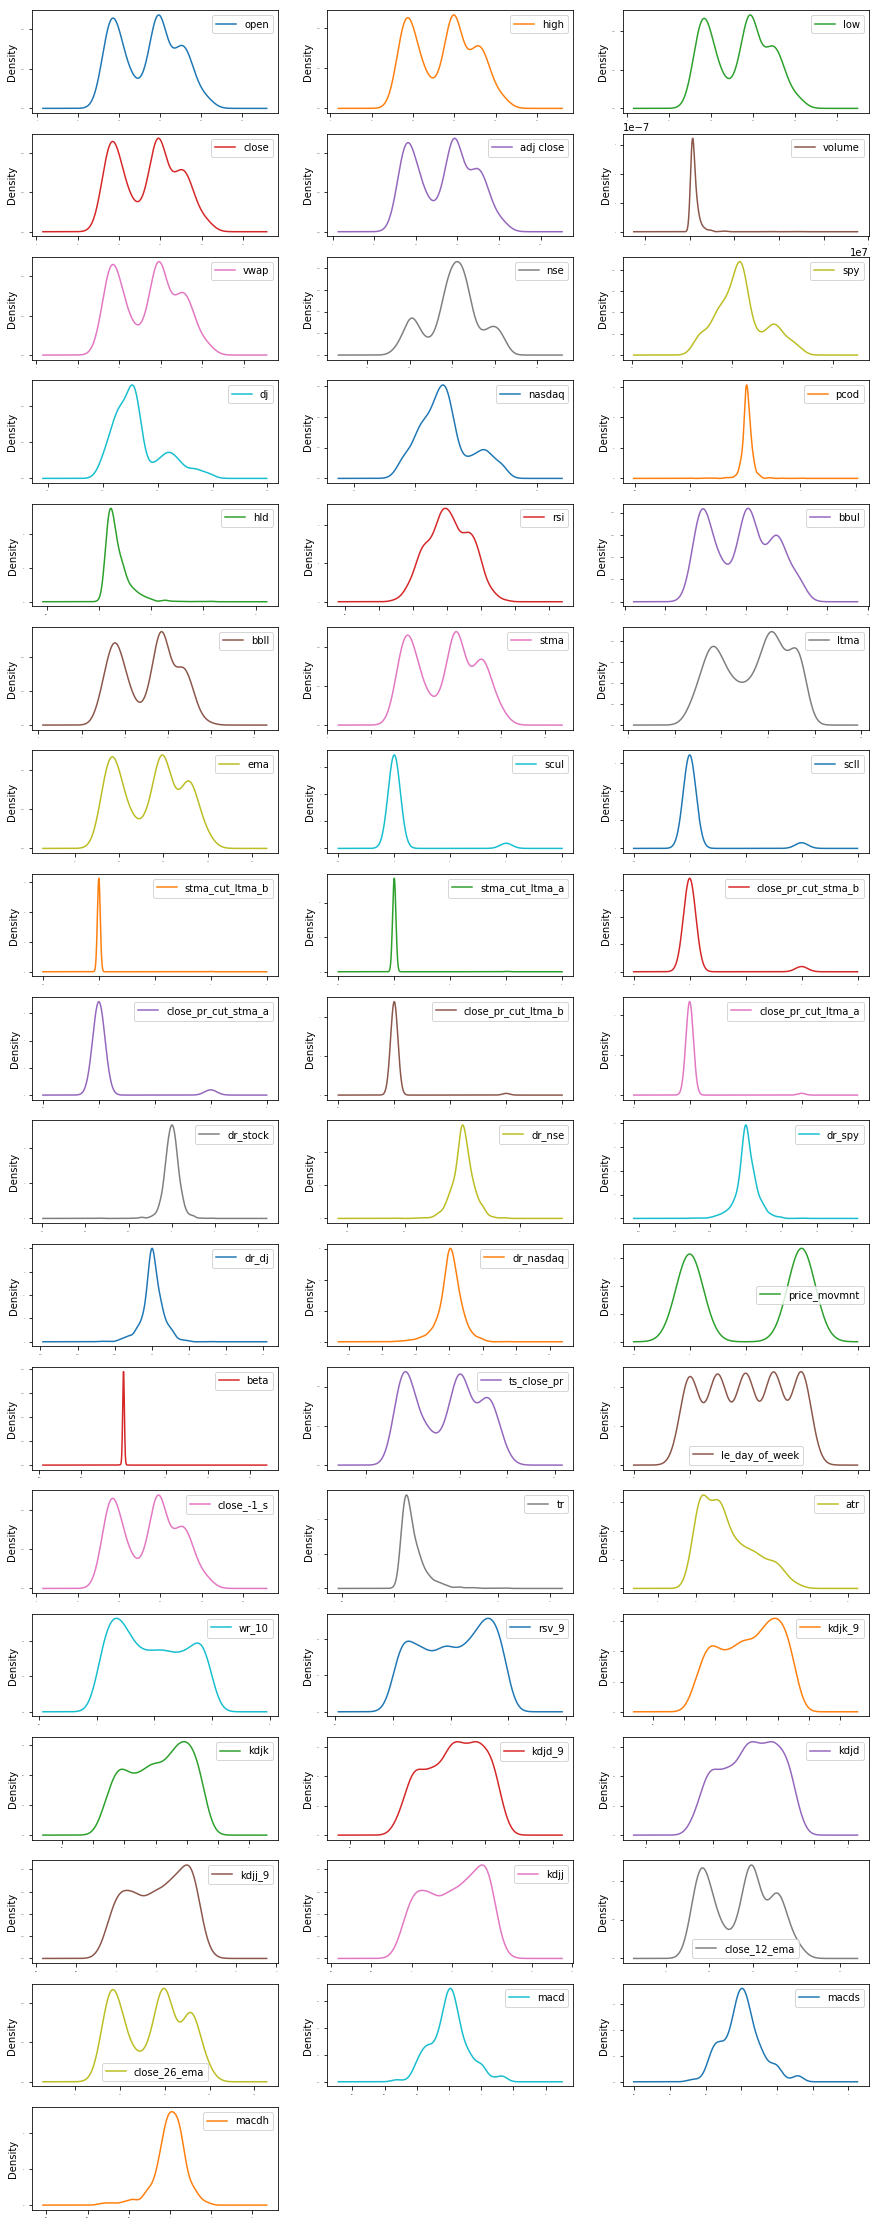

In [75]:
# density plots
lupin_df.plot(kind='density', subplots=True, layout=(20,3), sharex=False, fontsize=1, figsize=(15,45))
plt.show()

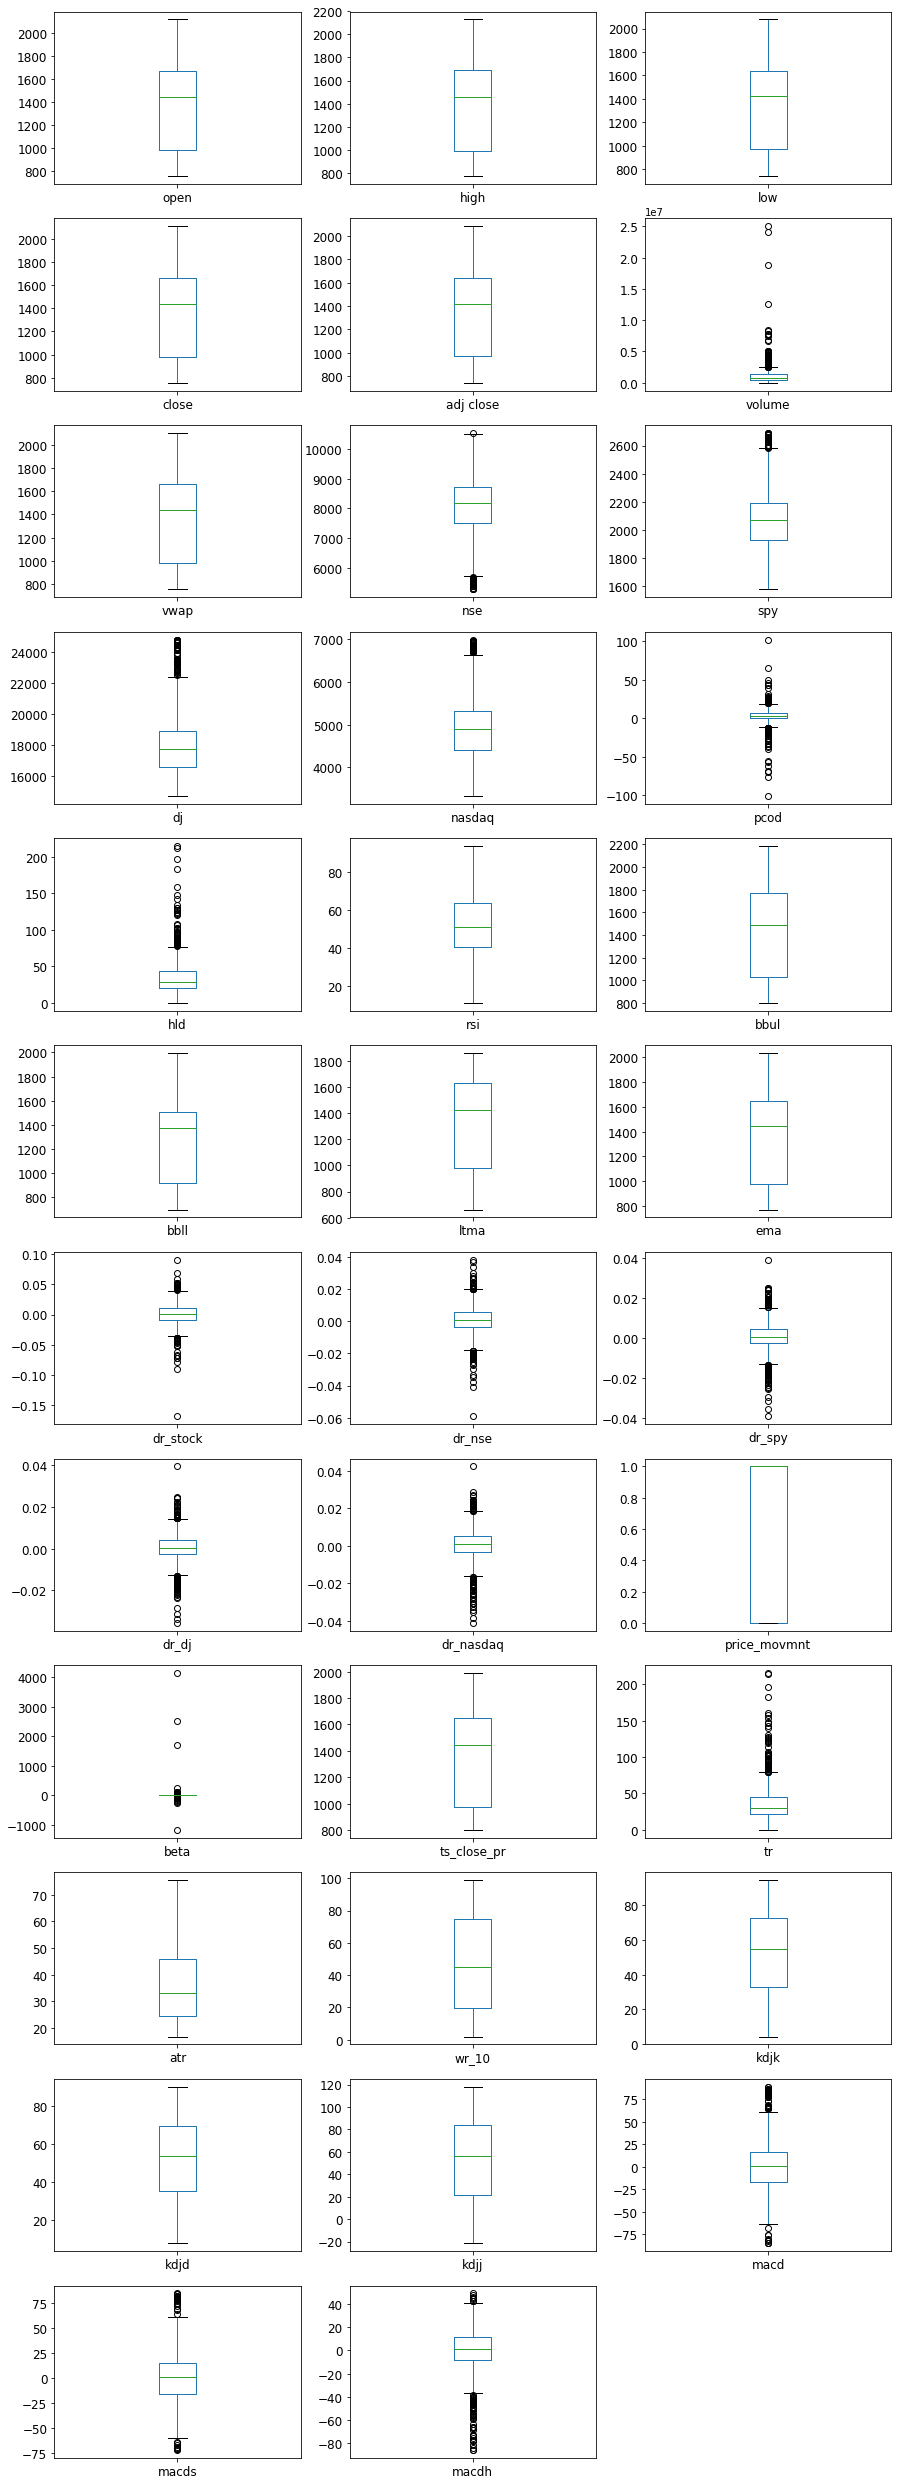

In [76]:
# Box and whisker plots

lupin_df[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'ltma',
'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
'beta', 'ts_close_pr', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd',
'macds', 'macdh']].plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, fontsize=12, figsize=(15,45))
plt.show()

# Data Pre-processing:
1. Remove rows with null data 
2. Dropped columns with string variable
3. Scale the variables using the RobustScaler

In [26]:
lupin_df.set_index(keys='date',inplace=True)

In [27]:
lupin_df.index

Index(['2013-06-25', '2013-06-26', '2013-06-27', '2013-06-28', '2013-07-01',
       '2013-07-02', '2013-07-03', '2013-07-04', '2013-07-05', '2013-07-08',
       ...
       '2017-12-18', '2017-12-19', '2017-12-20', '2017-12-21', '2017-12-22',
       '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-29', '2018-01-01'],
      dtype='object', name='date', length=1113)

In [ ]:
#  Dropping the categorical variable 
lupin_df.drop(['day_of_week','ds'], axis=1,inplace=True)


In [10]:
lupin_df.head()

,date,open,high,low,close,adj close,volume,vwap,nse,spy,...,kdjk,kdjd_9,kdjd,kdjj_9,kdjj,close_12_ema,close_26_ema,macd,macds,macdh
0,2013-01-01,615.150024,621.250000,612.000000,614.700012,599.083557,245907,615.70,5993.250000,1462.420044,...,43.063106,47.687702,47.687702,33.813915,33.813915,614.700012,614.700012,0.000000,0.000000,0.000000
1,2013-01-02,616.549988,619.900024,614.000000,614.900024,599.278503,381107,616.25,5993.250000,1462.420044,...,39.159274,44.844893,44.844893,27.788038,27.788038,614.808352,614.803864,0.004487,0.002493,0.003989
2,2013-01-03,618.700012,618.700012,606.299988,608.849976,593.382141,475306,609.67,5993.250000,1462.420044,...,31.791770,40.493852,40.493852,14.387607,14.387607,612.482796,612.664690,-0.181894,-0.073075,-0.217637
3,2013-01-04,608.000000,610.950012,602.750000,604.500000,589.142761,522833,605.92,6009.500000,1459.369995,...,24.347667,35.111790,35.111790,2.819420,2.819420,609.962940,610.382200,-0.419260,-0.190347,-0.457827
4,2013-01-07,609.599976,609.599976,597.500000,598.799988,583.587463,687589,601.43,6016.149902,1466.469971,...,18.056322,29.426634,29.426634,-4.684301,-4.684301,606.930005,607.696237,-0.766231,-0.361659,-0.809144


In [11]:
lupin_df.isnull().sum()

date                     0
open                     0
high                     0
low                      0
close                    0
adj close                0
volume                   0
vwap                     0
nse                      0
spy                      0
dj                       0
nasdaq                   0
pcod                     1
hld                      0
rsi                     19
bbul                    19
bbll                    19
stma                    19
ltma                   119
ema                     18
scul                     0
scll                     0
stma_cut_ltma_b          0
stma_cut_ltma_a          0
close_pr_cut_stma_b      0
close_pr_cut_stma_a      0
close_pr_cut_ltma_b      0
close_pr_cut_ltma_a      0
dr_stock                 1
dr_nse                   1
dr_spy                   1
dr_dj                    1
dr_nasdaq                1
price_movmnt             1
beta                     0
ts_close_pr              0
le_day_of_week           0
c

In [12]:
# Removing first 120 rows of the dataframe to drop NaNs in the first 120 rows containing 'ltma'=NaN

lupin_df = lupin_df.iloc[120:]

In [29]:
lupin_df['ltma'].head()

date
2013-06-25    661.194999
2013-06-26    662.404582
2013-06-27    663.763749
2013-06-28    665.238333
2013-07-01    666.724583
Name: ltma, dtype: float64

In [15]:
lupin_df['scul'].value_counts()

0    1055
1      58
Name: scul, dtype: int64

In [16]:
lupin_df['scll'].value_counts()

0    1049
1      64
Name: scll, dtype: int64

In [17]:
lupin_df['stma_cut_ltma_b'].value_counts()

0    1110
1       3
Name: stma_cut_ltma_b, dtype: int64

In [18]:
lupin_df['stma_cut_ltma_a'].value_counts()

0    1109
1       4
Name: stma_cut_ltma_a, dtype: int64

In [19]:
lupin_df['close_pr_cut_stma_b'].value_counts()

0    1054
1      59
Name: close_pr_cut_stma_b, dtype: int64

In [20]:
lupin_df['close_pr_cut_stma_a'].value_counts()

0    1054
1      59
Name: close_pr_cut_stma_a, dtype: int64

In [21]:
lupin_df['close_pr_cut_ltma_b'].value_counts()

0    1093
1      20
Name: close_pr_cut_ltma_b, dtype: int64

In [22]:
lupin_df['close_pr_cut_ltma_a'].value_counts()

0    1092
1      21
Name: close_pr_cut_ltma_a, dtype: int64

In [ ]:
lupin_df.info()

In [24]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

#lupin_df_cp=lupin_df.copy(deep=True)
#lupin_df = StandardScaler().fit_transform(lupin_df)
#print(lupin_df.shape)


# Normalize/standardize the data

In [31]:
#  Using the robustScaler to scale the data especially with outliers
scaler=RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
lupin_scaled=scaler.fit_transform(lupin_df)

In [32]:
lupin_scaled.shape

(1113, 52)

In [33]:
columns=['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap','nse', 'spy', 'dj','nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll','stma', 'ltma', 'ema', 'scul', 'scll','stma_cut_ltma_b','stma_cut_ltma_a','close_pr_cut_stma_b', 'close_pr_cut_stma_a','close_pr_cut_ltma_b','close_pr_cut_ltma_a', 'dr_stock', 'dr_nse','dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt', 'beta','ts_close_pr', 'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9', 'kdjk','kdjd_9', 'kdjd', 'kdjj_9','kdjj', 'close_12_ema', 'close_26_ema', 'macd', 'macds', 'macdh']

In [34]:
len(columns)

52

In [35]:
index=lupin_df.index

In [36]:
index.shape

(1113,)

In [37]:
lupin_scaled=pd.DataFrame(lupin_scaled,index=index,columns=columns)

In [38]:
lupin_scaled.price_movmnt.head(10)

date
2013-06-25   -1.0
2013-06-26   -1.0
2013-06-27    0.0
2013-06-28    0.0
2013-07-01   -1.0
2013-07-02    0.0
2013-07-03    0.0
2013-07-04    0.0
2013-07-05   -1.0
2013-07-08   -1.0
Name: price_movmnt, dtype: float64

In [39]:
lupin_scaled.price_movmnt=lupin_df.price_movmnt #  copying the original values for the price_movment column back as 
                                                #we dont want this to be scaled.


In [40]:
lupin_scaled.price_movmnt.head(10)

date
2013-06-25    0.0
2013-06-26    0.0
2013-06-27    1.0
2013-06-28    1.0
2013-07-01    0.0
2013-07-02    1.0
2013-07-03    1.0
2013-07-04    1.0
2013-07-05    0.0
2013-07-08    0.0
Name: price_movmnt, dtype: float64

#  Feature Selection:
1. Use pairplots and heatmaps.
2. use domain knowledge


In [77]:
temp1 = lupin_df[['open', 'high', 'low', 'close', 'adj close', 'price_movmnt']] 
temp2 = lupin_df[['volume', 'vwap', 'nse', 'spy', 'dj', 'price_movmnt']] 
temp3 = lupin_df[['nasdaq', 'pcod', 'hld', 'rsi', 'stma', 'price_movmnt']] 
temp4 = lupin_df[['ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'price_movmnt']]  
temp5 = lupin_df[['dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week', 'price_movmnt']] 
temp6 = lupin_df[['tr', 'atr','wr_10', 'kdjk', 'kdjd', 'price_movmnt']]  
temp7 = lupin_df[['kdjj', 'macd', 'macds', 'macdh', 'price_movmnt']] 

In [78]:
sns.pairplot(temp1, diag_kind='kde')

In [79]:
sns.pairplot(temp2, diag_kind='kde')

In [80]:
sns.pairplot(temp3, diag_kind='kde')

In [81]:
sns.pairplot(temp4, diag_kind='kde')

In [82]:
sns.pairplot(temp5, diag_kind='kde')

In [83]:
sns.pairplot(temp6, diag_kind='kde')

In [84]:
sns.pairplot(temp7, diag_kind='kde')

In [85]:
sns.heatmap(lupin_df[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr())

In [86]:
abs(lupin_df[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr()) > 0.7

,open,high,low,close,adj close,volume,vwap,nse
open,True,True,True,True,True,False,True,False
high,True,True,True,True,True,False,True,False
low,True,True,True,True,True,False,True,False
close,True,True,True,True,True,False,True,False
adj close,True,True,True,True,True,False,True,False
volume,False,False,False,False,False,True,False,False
vwap,True,True,True,True,True,False,True,False
nse,False,False,False,False,False,False,False,True


##### There is very high multi-collinearity among the variables 'open', 'high', 'low', 'close', 'adj close', and 'vwap'.

In [87]:
sns.heatmap(lupin_df[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr())

In [88]:
abs(lupin_df[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr()) > 0.7

,spy,dj,nasdaq,pcod,hld,rsi,bbul,bbll,stma
spy,True,True,True,False,False,False,False,False,False
dj,True,True,True,False,False,False,False,False,False
nasdaq,True,True,True,False,False,False,False,False,False
pcod,False,False,False,True,False,False,False,False,False
hld,False,False,False,False,True,False,False,False,False
rsi,False,False,False,False,False,True,False,False,False
bbul,False,False,False,False,False,False,True,True,True
bbll,False,False,False,False,False,False,True,True,True
stma,False,False,False,False,False,False,True,True,True


##### There is very high multi-collinearity US Indices: 'spy', 'dj', 'nasdaq' and also between 'bbul', 'bbll', 'stma' as expected...  STMA is used in the calculation of Bollinger bands.

In [89]:
sns.heatmap(lupin_df[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr())

In [90]:
abs(lupin_df[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr()) > 0.7

,ltma,ema,scul,scll,stma_cut_ltma_b,stma_cut_ltma_a
ltma,True,True,False,False,False,False
ema,True,True,False,False,False,False
scul,False,False,True,False,False,False
scll,False,False,False,True,False,False
stma_cut_ltma_b,False,False,False,False,True,False
stma_cut_ltma_a,False,False,False,False,False,True


####  Very little correlation exists between these moving averages and chart line cross-overs.  (please see the stock charts section)

In [91]:
sns.heatmap(lupin_df[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr())

In [92]:
abs(lupin_df[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr()) > 0.7

,close_pr_cut_stma_b,close_pr_cut_stma_a,close_pr_cut_ltma_b,close_pr_cut_ltma_a
close_pr_cut_stma_b,True,False,False,False
close_pr_cut_stma_a,False,True,False,False
close_pr_cut_ltma_b,False,False,True,False
close_pr_cut_ltma_a,False,False,False,True


####  All of the above variables would be strong predictors for stock price movement.

In [94]:
sns.heatmap(lupin_df[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr())

In [93]:
abs(lupin_df[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr()) > 0.7

,dr_stock,dr_nse,dr_spy,dr_dj,dr_nasdaq,beta,ts_close_pr,le_day_of_week
dr_stock,True,False,False,False,False,False,False,False
dr_nse,False,True,False,False,False,False,False,False
dr_spy,False,False,True,True,True,False,False,False
dr_dj,False,False,True,True,True,False,False,False
dr_nasdaq,False,False,True,True,True,False,False,False
beta,False,False,False,False,False,True,False,False
ts_close_pr,False,False,False,False,False,False,True,False
le_day_of_week,False,False,False,False,False,False,False,True


  #### Since there is high correlation between the US market indices, some of these could be dropped.

In [96]:
sns.heatmap(lupin_df[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr())

In [97]:
abs(lupin_df[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr()) > 0.7

,tr,atr,wr_10,kdjk,kdjd,kdjj,macd,macds,macdh
tr,True,False,False,False,False,False,False,False,False
atr,False,True,False,False,False,False,False,False,False
wr_10,False,False,True,True,True,True,False,False,False
kdjk,False,False,True,True,True,True,False,False,True
kdjd,False,False,True,True,True,False,False,False,True
kdjj,False,False,True,True,False,True,False,False,False
macd,False,False,False,False,False,False,True,True,False
macds,False,False,False,False,False,False,True,True,False
macdh,False,False,False,True,True,False,False,False,True


####  There is high correlation between wr_10, kdjk, kdjk, kdjj so some of these could be dropped.  Since macds is a ### 9 day MA of MACD, this might be dropped as well.

In [41]:
lupin_scaled.columns.T

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9', 'kdjk', 'kdjd_9',
       'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema', 'close_26_ema', 'macd',
       'macds', 'macdh'],
      dtype='object')

In [42]:
features_to_drop=['open', 'high', 'low', 'close','nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld','bbul', 'bbll','dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq','ts_close_pr', 'le_day_of_week',
       'close_-1_s', 'tr', 'atr', 'rsv_9', 'kdjk_9', 'kdjk', 'kdjd_9','kdjd', 'kdjj_9', 'kdjj','close_12_ema', 'close_26_ema','macds']

In [43]:
lupin_final=lupin_scaled.drop(columns=features_to_drop,axis=1)

In [44]:
lupin_final.columns.T

Index(['adj close', 'volume', 'vwap', 'rsi', 'stma', 'ltma', 'ema', 'scul',
       'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
       'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
       'price_movmnt', 'beta', 'macd', 'macdh'],
      dtype='object')

In [45]:
lupin_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1113 entries, 2013-06-25 to 2018-01-01
Data columns (total 19 columns):
adj close              1113 non-null float64
volume                 1113 non-null float64
vwap                   1113 non-null float64
rsi                    1113 non-null float64
stma                   1113 non-null float64
ltma                   1113 non-null float64
ema                    1113 non-null float64
scul                   1113 non-null float64
scll                   1113 non-null float64
stma_cut_ltma_b        1113 non-null float64
stma_cut_ltma_a        1113 non-null float64
close_pr_cut_stma_b    1113 non-null float64
close_pr_cut_stma_a    1113 non-null float64
close_pr_cut_ltma_b    1113 non-null float64
close_pr_cut_ltma_a    1113 non-null float64
price_movmnt           1113 non-null float64
beta                   1113 non-null float64
macd                   1113 non-null float64
macdh                  1113 non-null float64
dtypes: float64(19)
memory u

## Split the data into Train/Validation and Test data
##1. Held-out dataset = 20%.  Data for 2017 was used as held-out for final test accuracy.
##2.  Walk-Forward Validation: The time series was split in such a way that the training size would more or less remain constant across all splits 


In [46]:
#  Setting aside 20% of the data as hold out or test data
lupin_heldout=lupin_final[lupin_final.index.str.contains('2017')]
nrows_2017=len(lupin_final[lupin_final.index.str.contains('2017')])
nrows_2017

248

In [47]:
lupin_heldout.info()


<class 'pandas.core.frame.DataFrame'>
Index: 248 entries, 2017-01-02 to 2017-12-29
Data columns (total 19 columns):
adj close              248 non-null float64
volume                 248 non-null float64
vwap                   248 non-null float64
rsi                    248 non-null float64
stma                   248 non-null float64
ltma                   248 non-null float64
ema                    248 non-null float64
scul                   248 non-null float64
scll                   248 non-null float64
stma_cut_ltma_b        248 non-null float64
stma_cut_ltma_a        248 non-null float64
close_pr_cut_stma_b    248 non-null float64
close_pr_cut_stma_a    248 non-null float64
close_pr_cut_ltma_b    248 non-null float64
close_pr_cut_ltma_a    248 non-null float64
price_movmnt           248 non-null float64
beta                   248 non-null float64
macd                   248 non-null float64
macdh                  248 non-null float64
dtypes: float64(19)
memory usage: 38.8+ KB


In [48]:
lupin_heldout.price_movmnt.head(10)

date
2017-01-02    1.0
2017-01-03    0.0
2017-01-04    0.0
2017-01-05    1.0
2017-01-06    0.0
2017-01-09    0.0
2017-01-10    0.0
2017-01-11    1.0
2017-01-12    0.0
2017-01-13    1.0
Name: price_movmnt, dtype: float64

In [49]:
nrows_train=len(lupin_final) -nrows_2017
nrows_train

865

In [50]:
#  Removing the heldout dataset from the dataframe to create the train/Validate dataset

lupin_train=lupin_final[:nrows_train -1]
lupin_train.tail()

,adj close,volume,vwap,rsi,stma,ltma,ema,scul,scll,stma_cut_ltma_b,stma_cut_ltma_a,close_pr_cut_stma_b,close_pr_cut_stma_a,close_pr_cut_ltma_b,close_pr_cut_ltma_a,price_movmnt,beta,macd,macdh
date,,,,,,,,,,,,,,,,,,,
2016-12-26,-0.037661,0.096610,-0.010518,-0.767916,0.058102,0.172120,0.040493,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-9.201550,-0.442080,-1.014351
2016-12-27,0.026300,0.051579,-0.009607,-0.485667,0.052854,0.170929,0.037011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.832041,-0.447172,-0.841118
2016-12-28,0.038529,-0.266982,0.031260,-0.357313,0.049175,0.169675,0.035043,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.080103,-0.425980,-0.633240
2016-12-29,0.058540,-0.384151,0.037356,-0.317406,0.045908,0.168388,0.035198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9.620155,-0.371472,-0.379112
2016-12-30,0.086851,-0.458098,0.066149,-0.054634,0.045751,0.167422,0.038077,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.379845,-0.277657,-0.072185


In [ ]:
#lupin_train.reset_index
#lupin_train.head(5)
#len(lupin_train)

In [51]:
lupin_train.columns

Index(['adj close', 'volume', 'vwap', 'rsi', 'stma', 'ltma', 'ema', 'scul',
       'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
       'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
       'price_movmnt', 'beta', 'macd', 'macdh'],
      dtype='object')

In [ ]:

lupin_train_target=lupin_train['price_movmnt']
lupin_train_target

In [53]:

lupin_train.drop(columns='price_movmnt',axis=1,inplace=True)

/usr/local/anaconda/python3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [54]:
lupin_train.columns

Index(['adj close', 'volume', 'vwap', 'rsi', 'stma', 'ltma', 'ema', 'scul',
       'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
       'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
       'beta', 'macd', 'macdh'],
      dtype='object')

In [55]:
tscv = TimeSeriesSplit(n_splits=22,max_train_size=90)
print(tscv)  

TimeSeriesSplit(max_train_size=90, n_splits=22)


In [56]:
tscv.split(lupin_train)

<generator object TimeSeriesSplit.split at 0x7fc2f91693b8>

In [57]:
for train_index, test_index in tscv.split(lupin_train):
    print("\n\nTRAIN:", train_index, "\n\nTEST:", test_index)
    X_train, X_test = lupin_train.iloc[train_index], lupin_train.iloc[test_index]
    y_train, y_test = lupin_train_target.iloc[train_index], lupin_train_target.iloc[test_index]




TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49] 

TEST: [50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86]


TRAIN: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71
 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86] 

TEST: [ 87  88  89  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104
 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122
 123]


TRAIN: [ 34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51
  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69
  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87
  88  89  90  91  92  93  94  95  96  97  98  99 100

In [ ]:
lupin_train.iloc[test_index]

## MODEL SELECTION & HYPERPARAMETER TUNING

In [59]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [60]:
# build a classifier
clf = RandomForestClassifier(n_estimators=20)
#clf = LogisticRegression()

### The randomized search and the grid search explore exactly the same space of parameters. The result in parameter settings is quite similar, while the run time for randomized search is drastically lower.

### The performance is slightly worse for the randomized search, though this is most likely a noise effect and would not carry over to a held-out test set.

In [61]:
# specify parameters and distributions to sample from
param_dist = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]
             }

In [62]:
# initialize a randomizedsearch with the timeseries splitter
n_iter_search = 20
random_search = RandomizedSearchCV(clf, param_distributions=param_dist, cv=tscv,n_iter=n_iter_search)

In [63]:
len(lupin_train_target)

864

In [64]:
lupin_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 864 entries, 2013-06-25 to 2016-12-30
Data columns (total 18 columns):
adj close              864 non-null float64
volume                 864 non-null float64
vwap                   864 non-null float64
rsi                    864 non-null float64
stma                   864 non-null float64
ltma                   864 non-null float64
ema                    864 non-null float64
scul                   864 non-null float64
scll                   864 non-null float64
stma_cut_ltma_b        864 non-null float64
stma_cut_ltma_a        864 non-null float64
close_pr_cut_stma_b    864 non-null float64
close_pr_cut_stma_a    864 non-null float64
close_pr_cut_ltma_b    864 non-null float64
close_pr_cut_ltma_a    864 non-null float64
beta                   864 non-null float64
macd                   864 non-null float64
macdh                  864 non-null float64
dtypes: float64(18)
memory usage: 168.2+ KB


In [65]:
#Fitting the train and validate data to the randomizedsearch
start = time()
random_search.fit(lupin_train,lupin_train_target)
print("RandomizedSearchCV took %.2f seconds for %d candidates" " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 12.90 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.602 (std: 0.072)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 9, 'min_samples_leaf': 3, 'min_samples_split': 10}

Model with rank: 2
Mean validation score: 0.596 (std: 0.077)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 1, 'min_samples_leaf': 1, 'min_samples_split': 8}

Model with rank: 3
Mean validation score: 0.588 (std: 0.075)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'max_features': 8, 'min_samples_leaf': 3, 'min_samples_split': 2}



#  Applying the optimized model to the held-out data:

In [ ]:
lupin_heldout.head()

In [67]:
lupin_test_target=lupin_heldout.price_movmnt

In [68]:
lupin_test=lupin_heldout.drop(columns='price_movmnt',axis=1)

In [ ]:
lupin_test_target

In [ ]:
lupin_test.info()

In [71]:
#  Initializing a random forest model with the optimized parameters:
clf_randomforest=RandomForestClassifier(bootstrap= False, criterion= 'entropy', max_depth = None, max_features= 8, min_samples_leaf= 1, min_samples_split= 9,n_estimators=20,random_state=0)

In [72]:
clf_randomforest.fit(lupin_train,lupin_train_target)
score = clf_randomforest.score(lupin_test, lupin_test_target)
print('The accuracy of the randomforest classifier on the held out dataset is {0:.3f}'.format(score))

The accuracy of the randomforest classifier on the held out dataset is 0.657
